In [1]:
# Calcula la curva de Lorenz para el
# ingreso y para el subsidio de CFE.

import warnings

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

# Ignora warnings
# ¡¡usar solo al terminar el programa!!
# warnings.filterwarnings("ignore", category = UserWarning)

In [3]:
path_drive = "/content/drive/MyDrive/Colab/Subsidio_electricidad/"

# Escenarios.
#RCP = ["RCP4p5", "RCP8p5"]
RCP = ["RCP8p5"]
fut = [2030, 2050, 2070]
esc = ["Actual"] + fut

# Directorios.
csv = "_Pago.csv"
dirs = ["Actual"] + RCP
path_data = [path_drive + "data/" + x + "/data" for x in dirs]
path_files = ( [path_data[0] + csv] +
    [path_data[1] + "." + str(x) + csv for x in fut] )


# Datos.
df = []
for f in path_files:
    df.append( pd.read_csv(f).iloc[:, 1:] )

Mexico's income Gini coefficient: 0.34
Mexico's electric subsidy Gini coefficient: 0.16


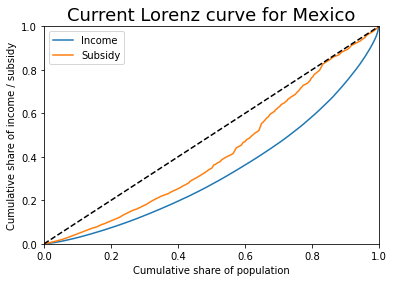

In [4]:
# Curva de Lorenz.

k = 0

# Ordenamos por ingreso per cápita.
df[k].sort_values("PCI", inplace = True)

# Población acumulada - eje x de Lorenz.
df[k]["Cum_Pop"] = (
    ( df[k]["Poblacion"] ).cumsum()
    / ( df[k]["Poblacion"] ).sum()
    )

# Ingreso acumulado - eje y de Lorenz.
df[k]["Cum_PIB"] = ( df[k]["PIB"].cumsum()
    / df[k]["PIB"].sum() )
# Lorenz para subsidio.
df[k]["Cum_Subs"] = ( df[k]["Subsidio"].cumsum()
    / df[k]["Subsidio"].sum() )

# Graficamos.
fig, ax = plt.subplots()
df[k].plot("Cum_Pop", "Cum_PIB", 
    # color = "k", linestyle = "dotted",
    ax = ax)
df[k].plot("Cum_Pop", "Cum_Subs",
    #color = "k", linestyle = "solid", 
    ax = ax)
ax.plot([0, 1], [0, 1], color = "k",
    linestyle = "dashed")

ax.set_title("Current Lorenz curve for Mexico",
    fontsize = 18)
ax.set_xlabel("Cumulative share of population")
ax.set_ylabel("Cumulative share of income / subsidy")
ax.legend(["Income", "Subsidy"])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Coeficiente de Gini para ingreso.
B = np.trapz(df[k]["Cum_PIB"], df[k]["Cum_Pop"])
G = 2 * (0.5 - B)
print(f"Mexico's income Gini coefficient: {G:.2f}")

# Coeficiente de Gini para subsidio.
B = np.trapz(df[k]["Cum_Subs"], df[k]["Cum_Pop"])
G = 2 * (0.5 - B)
print(f"Mexico's electric subsidy Gini coefficient: {G:.2f}")

Actual
Mexico's electric subsidy Gini coefficient: 0.16

2030
Mexico's electric subsidy Gini coefficient: 0.14

2050
Mexico's electric subsidy Gini coefficient: 0.11

2070
Mexico's electric subsidy Gini coefficient: 0.11



(0.0, 1.0)

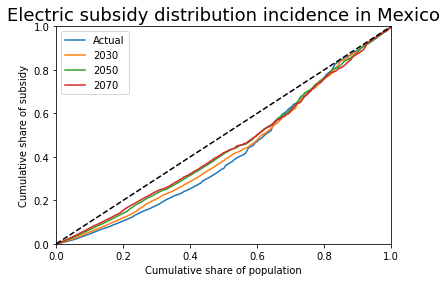

In [5]:
# Curva de Lorenz.

fig, ax = plt.subplots()

for k in range(len(df)):

    # Ordenamos por ingreso per cápita.
    df[k].sort_values("PCI", inplace = True)

    # Población acumulada - eje x de Lorenz.
    df[k]["Cum_Pop"] = (
        ( df[k]["Poblacion"] ).cumsum()
        / ( df[k]["Poblacion"] ).sum()
        )

    # Lorenz para subsidio.
    df[k]["Cum_Subs"] = ( df[k]["Subsidio"].cumsum()
        / df[k]["Subsidio"].sum() )

    # Graficamos.
    df[k].plot("Cum_Pop", "Cum_Subs", #color = "k",
        linestyle = "solid", ax = ax)

    # Coeficiente de Gini para subsidio.
    B = np.trapz(df[k]["Cum_Subs"], df[k]["Cum_Pop"])
    G = 2 * (0.5 - B)
    print(esc[k])
    print(f"Mexico's electric subsidy Gini coefficient: {G:.2f}")
    print()

ax.plot([0, 1], [0, 1], color = "k",
    linestyle = "dashed")

ax.set_title("Electric subsidy distribution incidence in Mexico",
    fontsize = 18)
ax.set_xlabel("Cumulative share of population")
ax.set_ylabel("Cumulative share of subsidy")
ax.legend(esc)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

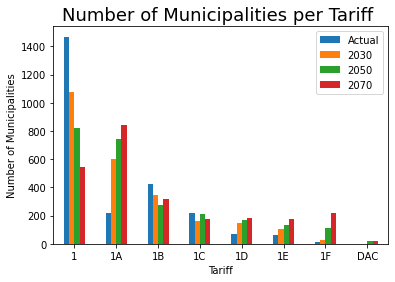

In [6]:
c = []
for k in range(len(df)):
    c.append(df[k].groupby("Tarifa").count().iloc[:, 0])
    c[k].name = esc[k]

count = pd.DataFrame(c).transpose()


# Graficamos.
fig, ax = plt.subplots()
count.plot(kind = "bar", # color = "k"
    ax = ax)

ax.set_title("Number of Municipalities per Tariff ",
    fontsize = 18)
ax.set_xlabel("Tariff")
ax.set_ylabel("Number of Municipalities")
ax.tick_params(axis = "x", rotation = 0)

(23.0, 32.29808818039016)

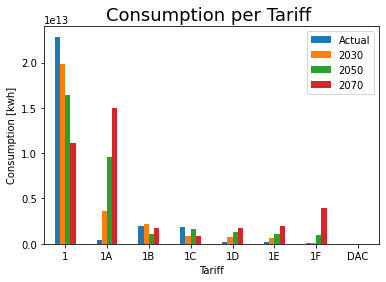

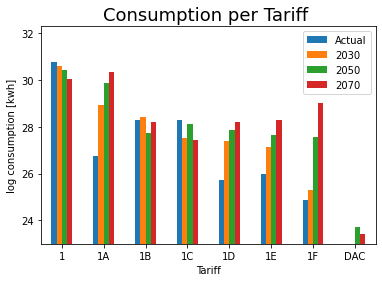

In [21]:
c = []
for k in range(len(df)):
    cons = df[k].groupby("Tarifa").sum()
    cons[esc[k]] = ( cons["Consumo_Usuario"]
        * cons["Usuarios_1*"] )
    c.append(cons[esc[k]])

count = pd.DataFrame(c).transpose()

# Graficamos.
fig, ax = plt.subplots()
count.plot(kind = "bar", # color = "k"
    ax = ax)

ax.set_title("Consumption per Tariff ",
    fontsize = 18)
ax.set_xlabel("Tariff")
ax.set_ylabel("Consumption [kwh]")
ax.tick_params(axis = "x", rotation = 0)

count = np.log( count )

# Graficamos.
fig, ax = plt.subplots()
count.plot(kind = "bar", # color = "k"
    ax = ax)

ax.set_title("Consumption per Tariff ",
    fontsize = 18)
ax.set_xlabel("Tariff")
ax.set_ylabel("log consumption [kwh]")
ax.tick_params(axis = "x", rotation = 0)
ax.set_ylim(23)

In [ ]:
# Distribución del subsidio per cápita.

# Ordenamos por ingreso per cápita.
df.sort_values("PCI", inplace = True)

# Población acumulada - eje x.
df["Cum_Pop"] = (
    ( df["Poblacion"] ).cumsum()
    / ( df["Poblacion"] ).sum()
    )

# Graficamos la distribución para todas las tarifas.
fig, ax = plt.subplots()

ax.scatter(df["Cum_Pop"], df["Subsidio_Usuario"],
    color = "k", s = 10, alpha = 0.5)

ax.set_title("Subsidy per user - All Tariffs",
    fontsize = 18)
ax.set_xlabel("Cumulative share of population")
ax.set_ylabel("Subsidy per user")
ax.set_xlim(0, 1)
ax.set_ylim(0)


# Repetimos para cada la tarifa.
T = ["1", "1A", "1B", "1C",
    "1D", "1E", "1F"]

for t in T:
    # Seleccionamos los municipios
    # con la tarifa en cuestión.
    df_i = df[df["Tarifa"] == t].copy()

    # Cantidad de municipios.
    n = df_i.shape[0]

    # Ordenamos por ingreso per cápita.
    df_i["Cum_Pop"] = (
        ( df_i["Poblacion"] ).cumsum()
        / ( df_i["Poblacion"] ).sum()
        )

    # Graficamos.
    fig, ax = plt.subplots()
    ax.scatter(df_i["Cum_Pop"],
        df_i["Subsidio_Usuario"], color = "k",
        s = 10, alpha = 0.5 + 7 / n )

    ax.set_title("Subsidy per user - Tariff " + t,
        fontsize = 18)
    ax.set_xlabel("Cumulative share of population")
    ax.set_ylabel("Subsidy per capita []")
    ax.set_xlim(0, 1)
    ax.set_ylim(0)